In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
lamostfull = pd.read_csv('lamost_full')

data = pd.read_csv('akurasiparam.csv')

In [36]:
scid = []
for i in lamostfull.obsid :
    scid.append('FLUX'+str(i))
lamostfull['obsid'] = scid

data.rename(columns = {'index' : 'obsid'}, inplace=True)

In [38]:
newdata = pd.merge(lamostfull, data, on = 'obsid', how = 'inner')
newdata.head(3)

,obsid,uid,gp_id,designation,obsdate,lmjd,mjd,planid,spid,fiberid,...,dec,wd_subclass_x,teff,teff_err,logg,logg_err,wd_subclass_y,wdsubclass1,y_actual,y_pred_proba
0,FLUX210043,G8934438930642,5187572001027818240,J025301.60-013006.8,2011-10-24,55859,55858,F5907,10,43,...,-1.501904,DAZ,26494.78,355.86,7.162,0.048,DAZ,0,0,0.280000
1,FLUX315238,L16628553400537,315238,J052107.51+293546.6,2011-10-24,55859,55858,F5909,15,238,...,29.596291,DA,-9999.00,-9999.00,-9999.000,-9999.000,DA,1,1,0.213333
2,FLUX815241,G17525367553984,166911298232972800,J035851.14+291013.7,2011-10-27,55862,55861,B6210,15,241,...,29.170498,DAZ,40993.20,764.56,7.885,0.097,DAZ,0,0,0.473333


In [39]:
# Menghitung SNR Lamost

meansnr = (newdata.snru + newdata.snrg + newdata.snrr + newdata.snri + newdata.snrz)/5
newdata['mean_snr_lamost'] = meansnr

In [47]:
import matplotlib
def plotSolution(x, y, z):
    '''
    Plots the color plot of the solution on a 2D meshgrid
    '''
    # Create 1D arrays with number of nodes
    #x = np.linspace(0, 1, self.Nx + 1)
    #y = np.linspace(1, 0, self.Ny + 1)

    # Create 2D mesh grid
    X, Y = np.meshgrid(x, y)

    # Plot solution on mesh grid
    matplotlib.rcParams['figure.figsize'] = 6.2, 5
    # plt.clf()
    plt.contourf(X, Y, z, 1)
    plt.colorbar()
    plt.xlabel(r'$x$ [$\mathrm{m}$]')
    plt.ylabel(r'$y$ [$\mathrm{m}$]')

TypeError: Input z must be 2D, not 1D

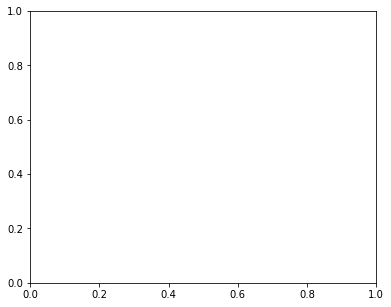

In [48]:
plotSolution(newdata.logg, newdata.teff, newdata.y_pred_proba)